### IDs:
Insert yours IDs to the cell below

ID #1: 807724

ID #2: 032480253


## Read the following instructions carefully:

1. This jupyter notebook contains all the step by step instructions needed for this exercise.
1. You are free to add cells.
1. Write your functions and your answers in this jupyter notebook only.
1. Answers to theoretical questions should be written in **markdown cells (with $\LaTeX$ support)**.
1. Submit this jupyter notebook only using your ID as a filename. Not to use ZIP or RAR. For example, your Moodle submission file name should look like this (two id numbers): `123456789_987654321.ipynb`.

In [14]:
%pip install scikit-learn==1.0

Note: you may need to restart the kernel to use updated packages.


In [15]:
%pip install tensorflow

     -------------------------------------- 266.3/266.3 MB 1.7 MB/s eta 0:00:00
     ---------------------------------------- 14.2/14.2 MB 2.0 MB/s eta 0:00:00
     ---------------------------------------- 65.5/65.5 kB 1.8 MB/s eta 0:00:00
     ---------------------------------------- 3.7/3.7 MB 1.9 MB/s eta 0:00:00
     -------------------------------------- 124.6/124.6 kB 2.4 MB/s eta 0:00:00
     ---------------------------------------- 1.7/1.7 MB 2.1 MB/s eta 0:00:00
     -------------------------------------- 439.2/439.2 kB 2.1 MB/s eta 0:00:00
     ---------------------------------------- 6.0/6.0 MB 2.1 MB/s eta 0:00:00
     ---------------------------------------- 57.5/57.5 kB 1.5 MB/s eta 0:00:00
     ---------------------------------------- 2.6/2.6 MB 1.8 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 2.1 MB/s eta 0:00:00
     -------------------------------------- 895.9/895.9 kB 2.0 MB/s eta 0:00:00
     -------------------------------------- 781.3/

In [16]:
%pip install tensorflow_probability

     ---------------------------------------- 6.7/6.7 MB 7.5 MB/s eta 0:00:00
     ---------------------------------------- 101.5/101.5 kB ? eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
import tensorflow_probability as tfp
import random
import warnings
warnings.filterwarnings('ignore')
np.random.seed(100)

### Question 1 - Data exploration and visialization - practical

Load Boston dataset from sklearn.
Explore the data. follow th instructions below and make sure to support your answers with proper outputs and plots.
When plotting, pay close attention to the range of the axis, and include axis labels and a title for the figure.

1. Describe the dataset. How many samples does it contain? How many features? What isis the data type for each variable?
2. Produce a histogram and a boxplot of the nitric oxides concentration. describe the distribution.
3. Produce a correlation matrix of all the features. Are there any correlated features? Can you identify one feature with unusual behaviour?
4. Select the 2 pairs of features with the highest correlation (positive or negative) and plot 2 scatter plots with marginal histograms (JointPlot). 
5. Produce a cumulative histogram of the age variable and add two horizontal lines on the first and third quartile (on the cumulative count)
6. Identify and report 2 “interesting” trends in the data. No need to provide statistical confidence at this point. 

In [5]:
# PART 1
from sklearn.datasets import load_boston
boston = load_boston()

# Description of dataset
print(boston.DESCR)

# Number of features
print(len(boston.feature_names))

# Number of samples
print(len(boston.data))

# Converting to Dataframe
data = np.c_[boston['data'], boston['target']]
columns = np.append(boston['feature_names'], 'MEDV')
df= pd.DataFrame(data, columns= columns)
df.head()

# Types of columns
df.dtypes

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

<AxesSubplot: title={'center': 'Distribution of Nitric Oxide Concentrations'}, ylabel='Frequency'>

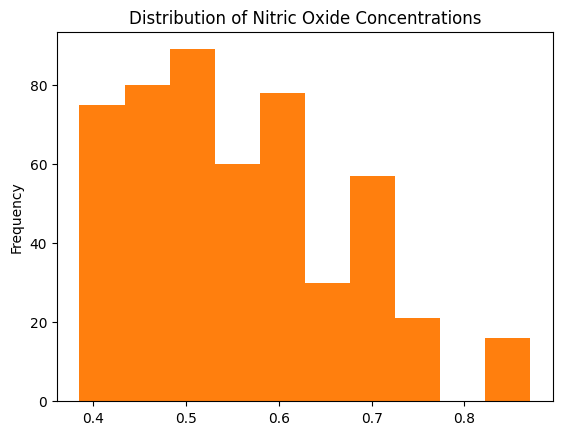

In [5]:
# PART 2
df['NOX'].plot(kind='hist', title='Distribution of Nitric Oxide Concentrations')

<AxesSubplot: title={'center': 'Distribution of Nitric Oxide Concentrations'}, ylabel='Frequency'>

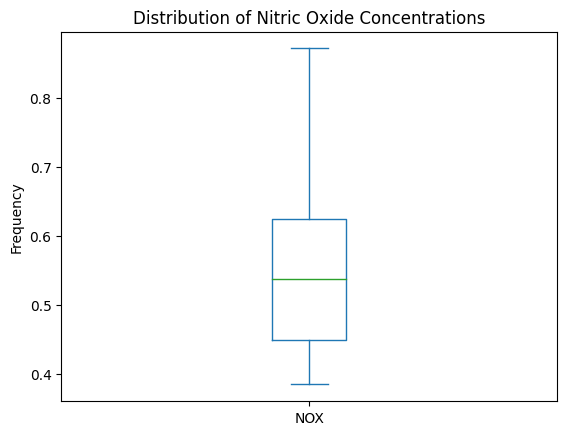

In [7]:
df['NOX'].plot(kind='box', title='Distribution of Nitric Oxide Concentrations', ylabel = 'Frequency')

 The distributio is uniform and skewed to the left, we can see this in both the histogram and the boxplot. No apparent outliers according to the boxplot.

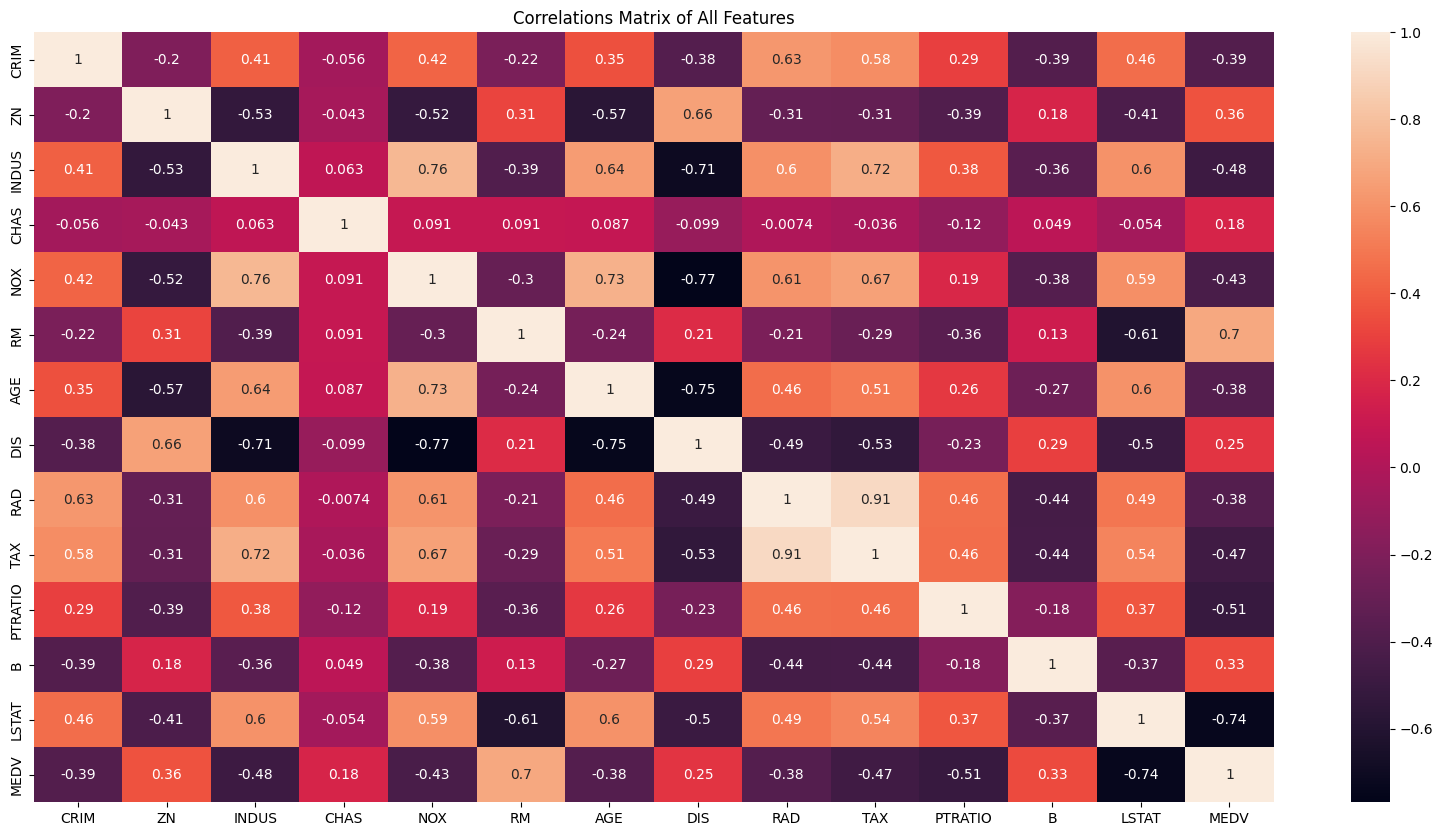

In [44]:
# PART 3
c = df.corr()
plt.figure(figsize=(20, 10))
ax = plt.axes()
sns.heatmap(c, annot= True)
ax.set_title('Correlations Matrix of All Features')
plt.show()

Correlated features: 
- Positive Correlation: RAD (index of accessibility to radial highways) and TAX (full-value property-tax rate per $10,000)
- Negative Correlation: DIS (weighted distances to five Boston employment centres) and AGE (proportion of owner-occupied units built prior to 1940)

As for unusual behaviour, CHAS (Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)) has all its correlations pretty much between -0.2 and 0.2, meaning it doesn't have a high or low correlation to any other variable.

Text(0.5, 0.98, 'TAX & RAD Jointplot')

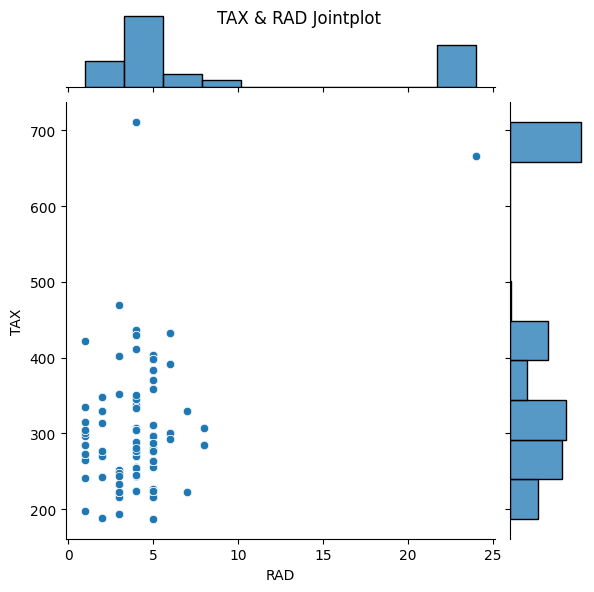

In [12]:
#PART 4
sns.jointplot(x = 'RAD', y = 'TAX', edgecolor="white", data=df)
plt.suptitle("TAX & RAD Jointplot")

Text(0.5, 0.98, 'DIS & AGE Jointplot')

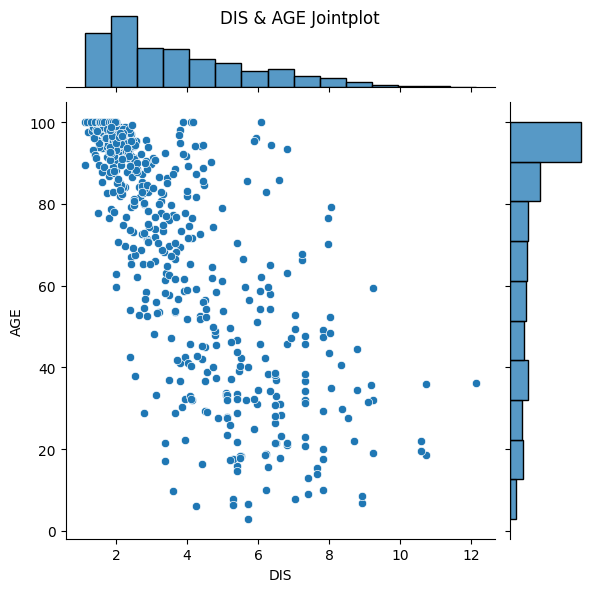

In [13]:
sns.jointplot(x = 'DIS', y = 'AGE', edgecolor="white", data=df)
plt.suptitle("DIS & AGE Jointplot")

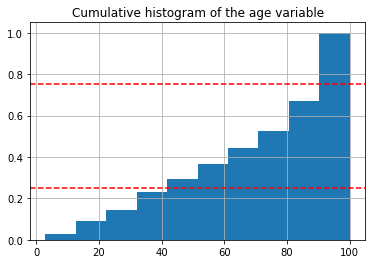

In [9]:
#PART 5
plt.axhline(0.25, color='r', linestyle='--')
plt.axhline(0.75, color='r', linestyle='--')
df['AGE'].hist(density= True,cumulative = True)
plt.title('Cumulative histogram of the age variable')
plt.show()

In [41]:
#PART 6
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


From the table above we can see that ZN and CHAS have both 0 at the min value, 25% percentile and 50% percentile. This makes sense as they are categorical (CHAS specifically can only be either 1 or 0).

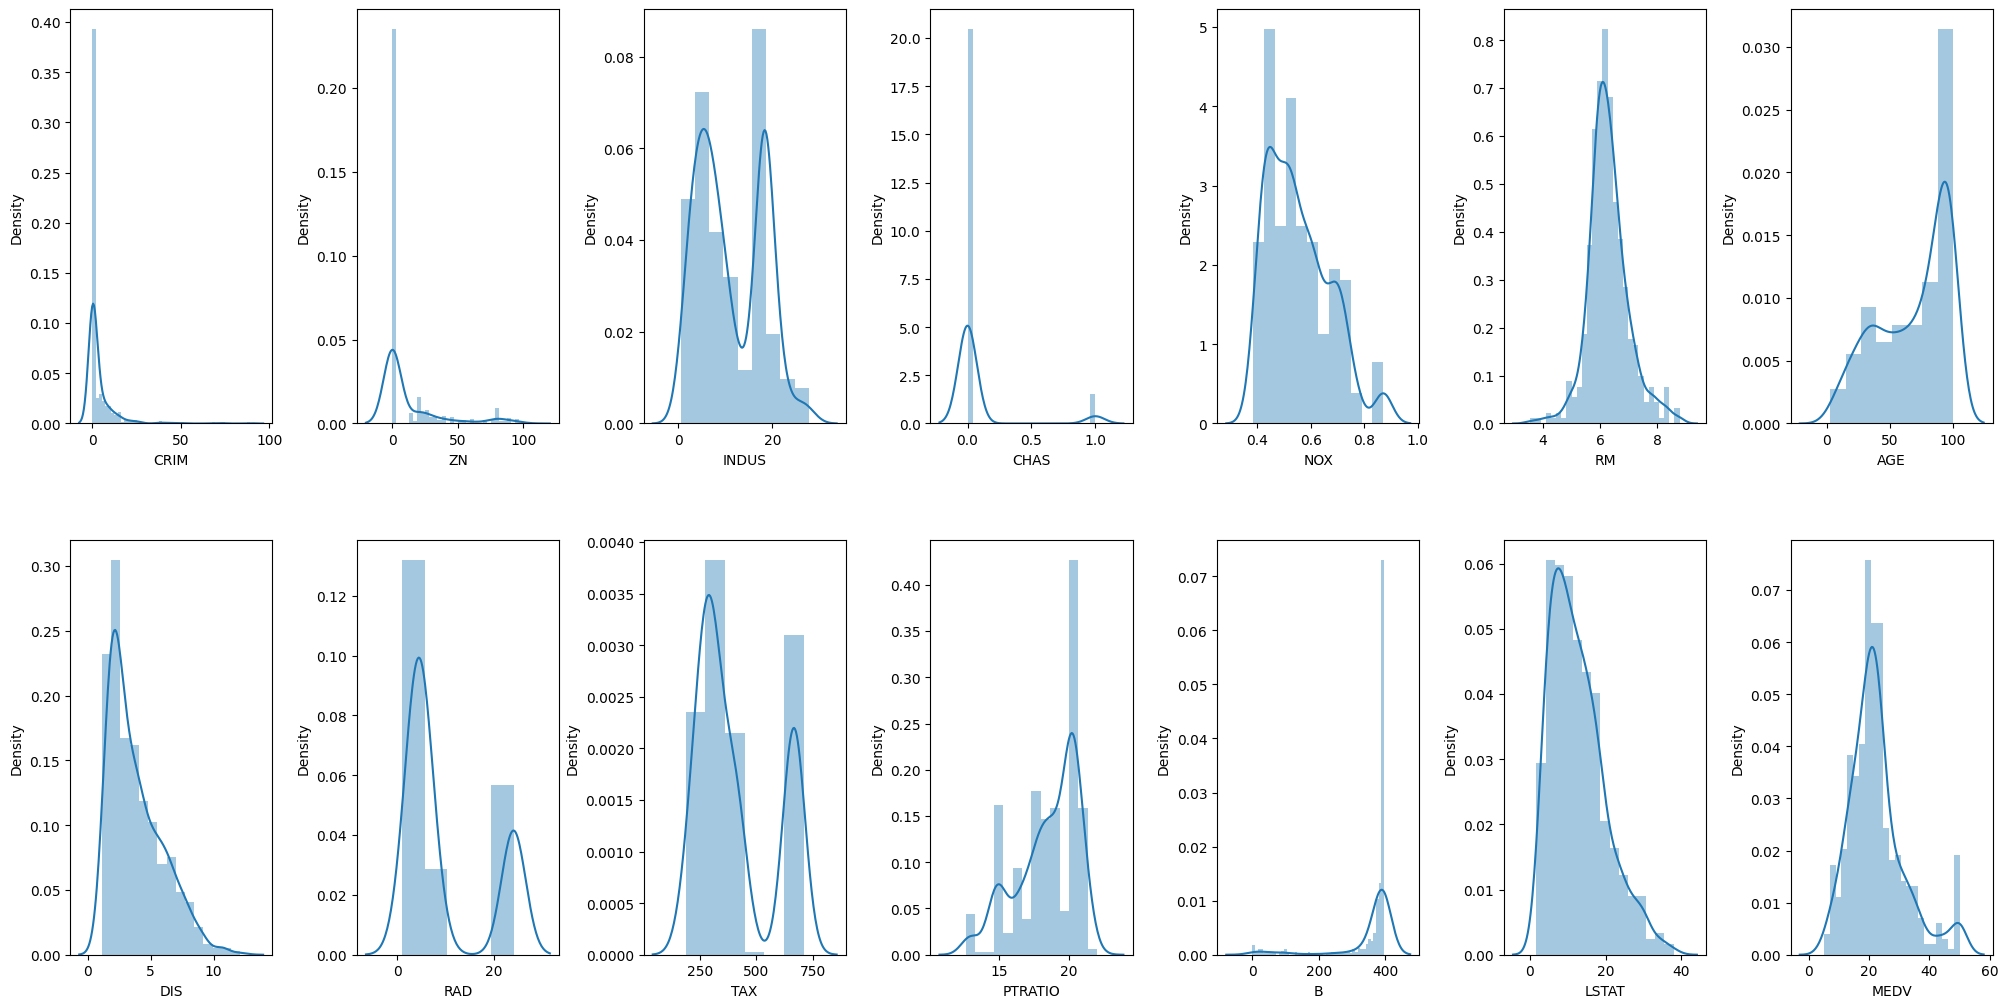

In [6]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df.iteritems():
    sns.distplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

Looking at the graphs in the subplots above we can see that most of the features have uniform or bimodal distributions (except CHAS which is a discrete variable). We can also see that CRIM, ZN, and B are highly skewed.  

### Question 2 - Independence and conditional independence

#### 2.A
Let $\ X, Y \ $ and $Z$  be discrete random variables with $\ n, m \ $ and $k=4$ possible outcomes respectivley.

How many parameters define the joint distribution of $\ X, Y \ $ and $Z$?

It takes $(n*m*4)-1$ parameters to build the pmf or pdf of the joint distribution of $X, Y$ and $Z$.

#### 2.B
For the same random variables from the previous section, how many parameters define the joint distribution of $\ X, Y \ $ and $Z$ if we now know that they are independent?

If $X, Y$ and $Z$ are independent, then: $$P(X,Y,Z)=P(X)*P(Y)*P(Z)$$ $P(X)$ has $(n-1)$ parameters, $P(Y)$ has $(m-1)$ parameters and $P(Z)$ has 3 parameters. Hence, the joint distribution assuming independence will be defined by $(n-1)+(m-1)+3=n+m+1$ parameters.

#### 2.C
For the same random variables from the previous section, how many parameters define the joint distribution of $\ X, Y \ $ and $Z$ if we now know that $X$ and $Y$ are conditionaly independent given $Z$?

If $X, Y$ are conditionaly independent  given $Z$, then: $$P(X,Y,Z)=P(X|Z)*P(Y|Z)*P(Z)$$ $P(X|Z)$ will have $(n-1)*4$ parameters and $P(Y|Z)$ will have $(m-1)*4$ parameters since both $X$ and $Y$ are conditionaly independent given $Z$. Finally, for $P(Z)$ we need $3$ parameters. Therefore, the joint distribution assuming conditional independence will be defined by $[(n-1)*4]+[(m-1)*4]+3=4n+4m-5$ parameters.

#### 2.D
Give an example for a joint distribution of $\ U, V \ $ and $W$ where $U$ and $V$ are NOT conditionally independent given $W$, but $U$ and $V$ are (unconditionally) independent. Also: $U$ and $V$ are standard normally distributed ($N(0, 1)$) and $W$ is a coin (2 possible values).

We know that:
- $P(U,V|W)$ ${ \neq }$ $P(U|W)*P(V|W)$
- $P(U,V)=P(U)*P(V)$
- $U$ and $V$ are standar normal
- $W$ is a coin

Consider the random variable $Z=U+V$ and have $W=0$ if $Z$ is negative and $W=1$ if $Z$ is positive. Hence, knowing the result of $W$ we can infer $U$ and $V$ $(P(U,V|W))$. For example, if $W=1$ then we know that the sum of $U$ and $V$ must be positive. Also, $P(U,V|W)$ ${ \neq }$ $P(U|W)*P(V|W)$ because if we look only at the right side of the equation, knowing $W$ doesn't give enough information about only $U$ or only $V$. $U$ and $V$ are two standard normal distributions, they are independent one from another. 

### Question 3 - Gaussian mixtures – parameter estimation and generation 

Consider the data provided in GMD.csv
Assume that the data comes from a Gaussian mixture distribution (GMD) with $k=3$. Furthermore, assume that $\mu_{1}=4, \mu_{2}=9, \sigma_{1}=\sigma_{2}=0.5, \sigma_3=1.5$ and $w_2=0.25$.

Read the data and answer the following questions.

In [4]:
# Read the dataset and assume no header
gmd_data = pd.read_csv("GMD.csv", header = None)

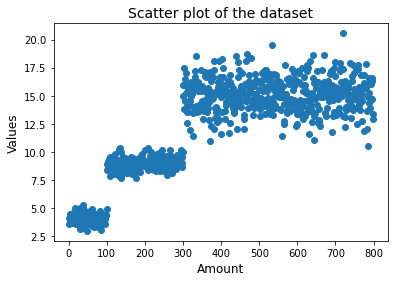

In [11]:
# Initial scatter plot to visualice how the data is distributed
plt.scatter(gmd_data[0],gmd_data[1])
plt.xlabel("Amount",fontsize=12)
plt.ylabel('Values', fontsize=12)
plt.title("Scatter plot of the dataset", fontsize=14)
plt.show()

#### 3.A
Provide an estimate for the other parameters of the distribution in two different ways.

* First method: Using Expectation Maximization considering the known parameters

In [31]:
def em(iterations):
    k = 3
    n_samples = gmd_data.shape[0]

    # Initial guesses for the parameters
    means = [[4],[9],[np.mean(gmd_data[1])]] #best initial guess for mu3 is the mean of the dataset
    sigmas = [[0.5],[0.5],[1.5]]
    weights = [[0.375],[0.25],[0.375]] #assuming that w1 and w3 have the remaining 0.75 of the weight

    for em_iteration in range(iterations):
        ############## E-step
        # 1. Calculate responsabilities
        responsibilities = np.zeros((n_samples,k))

        for i in range(n_samples):
            for cluster in range(k):
                responsibilities[i,cluster] = weights[cluster]*tfp.distributions.Normal(loc=means[cluster],scale=sigmas[cluster]).prob(gmd_data[1][i])

        #2. Normalize the responsibilities
        responsibilities = responsibilities/np.linalg.norm(responsibilities,axis=1,ord=1,keepdims=True)

        #3. Calculate cluster responsibilities
        k_responsibilities = np.sum(responsibilities, axis=0)

        ############## M-step
        #1. Update weights 1 and 3
        weights[0] = k_responsibilities[0]/n_samples
        weights[2] = 1-weights[0]-0.25
        #2. Update mu3
        means[2] = np.sum(responsibilities[:,2]*gmd_data[1])/k_responsibilities[2]
    
    return weights, means, sigmas

In [32]:
# Run 3 iterations
em(3)

([0.12499999995763457, [0.25], 0.6250000000423654],
 [[4], [9], 15.100939268296509],
 [[0.5], [0.5], [1.5]])

In [20]:
# Run 10 iterations
em(10)

([0.1249999999586974, [0.25], 0.6250000000413026],
 [[4], [9], 15.101062170761814],
 [[0.5], [0.5], [1.5]])

In [33]:
# Run 20 iterations
em(20)

([0.1249999999586974, [0.25], 0.6250000000413026],
 [[4], [9], 15.101062170761816],
 [[0.5], [0.5], [1.5]])

Assuming an ${\epsilon}=1^{-14}$ as the required difference between results in between iterations, we can conclude that on iteration 20 there is convergence. Therefore, the estimates according to the expectation maximization method are:
- ${\mu_3} = 15.101$
- $w_1 = 0.125$
- $w_3 = 0.625$

* Second method: Mathematical reasoning

We use the equations of the expectation and the variance calculation with the known parameters and solve for the unknown parameters: $$E(X)=w_1*{\mu_1}+w_2*{\mu_2}+w_3*{\mu_3}$$ $$V(X)=w_1*{\sigma_1}^2+w_2*{\sigma_2}^2+w_3*{\sigma_3}^2+w_1*({\mu_1}-{\mu})^2+w_2*({\mu_2}-{\mu})^2+w_3*({\mu_3}-{\mu})^2$$

Since all the weights equal to 1 we can substitute $w_3=1-w_1-w_2$.

In [26]:
#Import sympy library and values
import sympy as sym

#Sample values
mu = np.mean(gmd_data[1])
sigma = np.std(gmd_data[1])**2

#Declaring variables
w_1, w_2, w_3 = symbols("w_1, w_2, w_3")
mu_1, mu_2, mu_3 = symbols("mu_1, mu_2, mu_3")
s_1, s_2, s_3 = symbols("s_1, s_2, s_3")

#Expectation
exp_eq = Eq(w_1*4+0.25*9+(1-w_1-0.25)*mu_3,mu)

#Variance
var_eq = Eq(w_1*(0.5**2)+0.25*(0.5**2)+(1-w_1-0.25)*(1.5**2)+(w_1*(4-mu)**2)+(0.25*(9-mu)**2)+(1-w_1-0.25)*(mu_3-mu)**2, sigma)

sym.solve([exp_eq,var_eq],(w_1,mu_3), dict=True)

[{w_1: -37.7682339570229, mu_3: 4.18040398970170},
 {w_1: 0.123200492088127, mu_3: 15.0862293195793}]

The weights need to be positive values, therefore we take the solution where ${w_3}=0.123$. Then, substituting the values of ${w_1}$ and ${w_2}$ we can obtain ${w_3}$.
The estimates according to the mathematical reasoning method are:
- ${\mu_3} = 15.086$
- $w_1 = 0.123$
- $w_3 = 0.627$

#### 3.B
Plot a graph of the pdf of the distribution you inferred. Select adequate limits for the axes for this plot and explain your decision.

Around 99.7% of the data will be located at 3 deviations from the mean. Therefore, the selected limits are:
- Minimum: ${\mu}-3*{\sigma}$ 
- Maximum: ${\mu}+3*{\sigma}$

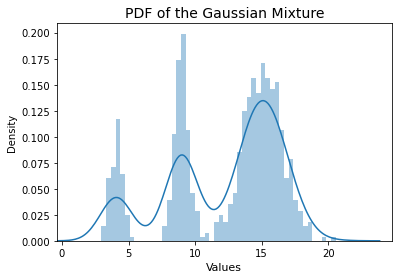

In [88]:
sns.distplot(gmd_data[1],bins=50)
sigma_gmd = np.std(gmd_data[1])
mean_gmd = np.mean(gmd_data[1])
plt.xlim(xmin=mean_gmd-3*sigma_gmd, xmax=mean_gmd+3*sigma_gmd)
plt.xlabel("Values",fontsize=11)
plt.title("PDF of the Gaussian Mixture", fontsize=14)
plt.show()

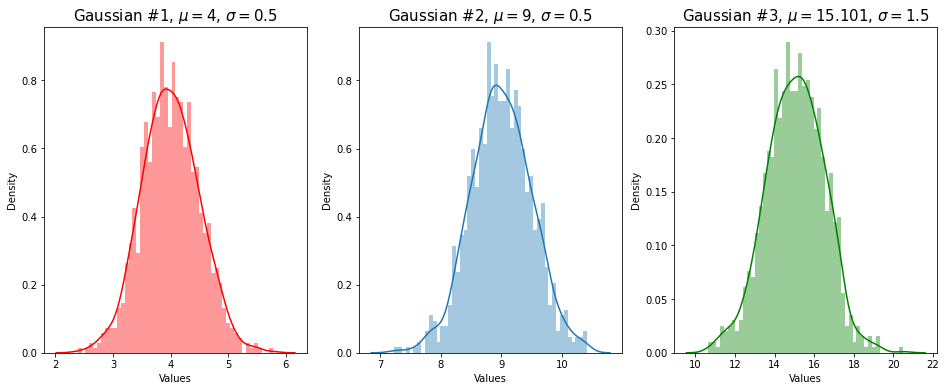

In [57]:
fig, ax = plt.subplots(1, 3, figsize=(16,6))
gaussian1 = stats.norm.rvs(loc=4,scale=0.5,size=1000)
gaussian2 = stats.norm.rvs(loc=9,scale=0.5,size=1000)
gaussian3 = stats.norm.rvs(loc=15.101,scale=1.5,size=1000)

sns.distplot(gaussian1, ax=ax[0], bins=50, color="red")
sns.distplot(gaussian2, ax=ax[1], bins=50)
sns.distplot(gaussian3, ax=ax[2], bins=50, color="green")
ax[0].set_title("Gaussian #1, ${\mu}=4$, ${\sigma}=0.5$", fontdict={"fontsize": 15})
ax[0].set(xlabel="Values")
ax[1].set_title("Gaussian #2, ${\mu}=9$, ${\sigma}=0.5$", fontdict={"fontsize": 15})
ax[1].set(xlabel="Values")
ax[2].set_title("Gaussian #3, ${\mu}=15.101$, ${\sigma}=1.5$", fontdict={"fontsize": 15})
ax[2].set(xlabel="Values")

plt.show()

#### 3.C
Now assume that the data comes from a Gaussian mixture distribution (GMD) with $k=4$.

The given data and parameters stay the same.

Can you estimate the unknown parameters in the two ways described in section A? Explain.

- First method: Using Expectation Maximization

We use the expectation maximization algorithm, assuming as initial guesses for ${\mu_4}$ the mean of the dataset (the same initial assumption will be made for ${\mu_3}$), for  ${\sigma_4}$ the standard deviation of the dataset, and for the weight, we assume that the remaining 0.75 is equally divided between $w_1,w_3$ and $w_4$. After running the expectation maximization algorithm, we will have the values for the missing parameters.

- Second method: Mathematical Reasoning

The second method cannot be used because there are too many unknown variables.

#### 3.D
Describe two ways for generating data for a GMM random variable with:
* centers at  $\mu_1=3, \mu_2=7, \mu_3=10$
* $\sigma_1=\sigma_2=\sigma_3=1$
* $w_1=w_2=w_3=0.33$

* First method: 
1. Generate data for each normal distribution with the provided ${\mu}$ and ${\sigma}$
2. Create an empty list where the gaussian mix values will be saved
3. Run a for loop $n$ times where, for each iteration, it creates a random probability p that according to its value will designate which normal distribution follows the data point.

* Second method: 
1. Generate data for each normal distribution with the provided ${\mu}$ and ${\sigma}$.
2. Join the generated data points from the first distribution to the generated data points of the second distribution
3. Join the generated data points from the third distribution to the obtained distribution from step 2.

#### 3.E
Use one of the above approaches to generate 1000 points and plot a histogram of the result (decide on bins, axes etc)


In [81]:
g1 = stats.norm.rvs(loc=3,scale=1, size=1000)
g2 = stats.norm.rvs(loc=7,scale=1, size=1000)
g3 = stats.norm.rvs(loc=10,scale=1, size=1000)

w1=0.33

gaussian_mix = []
for i in range(1000):
    p=stats.uniform.rvs(size = 1)
    if p < w1:
        gaussian_mix.append(np.random.choice(a=g1,size=1))
    elif p > w1 and p < 0.66:
        gaussian_mix.append(np.random.choice(a=g2,size=1))
    else: 
        gaussian_mix.append(np.random.choice(a=g3,size=1))

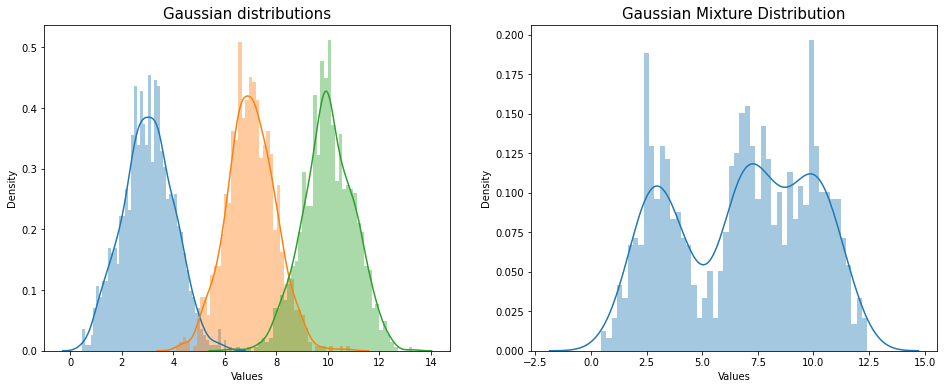

In [82]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
sns.distplot(g1, ax=ax[0], bins=50)
sns.distplot(g2, ax=ax[0], bins=50)
sns.distplot(g3, ax=ax[0], bins=50)
ax[0].set_title("Gaussian distributions", fontdict={"fontsize": 15})
ax[0].set(xlabel="Values")

sns.distplot(gaussian_mix, ax=ax[1], bins=50)
ax[1].set_title("Gaussian Mixture Distribution", fontdict={"fontsize": 15})
ax[1].set(xlabel="Values")
plt.show()

#### 3.F
Use the other one to generate 1000 more points and draw two comparative histograms.

In [83]:
#Since all the weights are the same, we use the same amount of points for each gaussian
g1 = stats.norm.rvs(loc=3,scale=1, size=333)
g2 = stats.norm.rvs(loc=7,scale=1, size=333)
g3 = stats.norm.rvs(loc=10,scale=1, size=334)

gaussian_mix_1_and_2 = np.append(g1,g2)
gaussian_mix_final = np.append(gaussian_mix_1_and_2, g3)

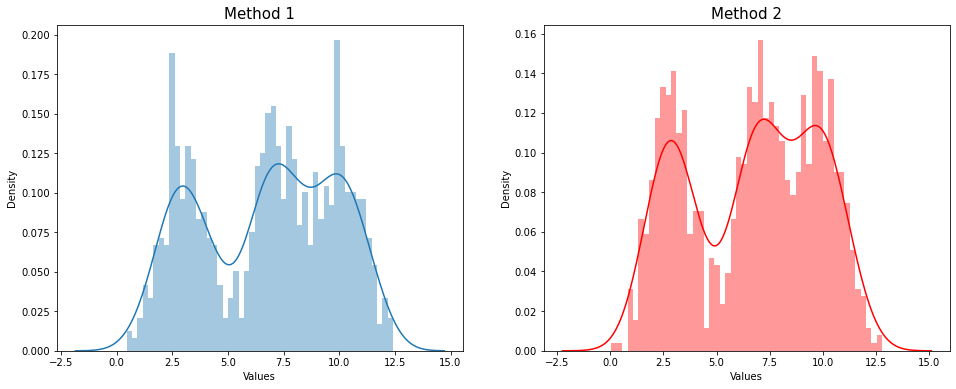

In [85]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
sns.distplot(gaussian_mix, ax=ax[0], bins=50)
ax[0].set_title('Method 1', fontdict={'fontsize': 15})
ax[0].set(xlabel="Values")

sns.distplot(gaussian_mix_final, ax=ax[1], bins=50, color="red")
ax[1].set_title('Method 2', fontdict={'fontsize': 15})
ax[1].set(xlabel="Values")
plt.show()

### Question 4 - Normally distributed salaries

The annual salaries of employees in a large Randomistan company are approximateley normally distributed with a mean of 75,000 RCU and a standard deviation of 37,500 RCU.

#### 4.A
What percent of people earn less than 50,000 RCU?

In [12]:
probability_pdf = stats.norm.cdf(50000, loc=75000, scale=37500)
print(probability_pdf*100)

25.24925375469229


#### 4.B
What percent of people earn between 45,000 RCU and 65,000 RCU?

In [13]:
prob_65 = stats.norm.cdf(65000, loc=75000, scale=37500)
prob_45 = stats.norm.cdf(45000, loc=75000, scale=37500)
print((prob_65 - prob_45)*100)

18.30075118806284


#### 4.C
What percent of people earn more than 85,000 RCU?

In [14]:
prob_85 = stats.norm.cdf(85000, loc=75000, scale=37500)
print((1-prob_85)*100)

39.48629104640251


#### 4.D
The company has 1000 employees. How many employees in the company do you expect to earn more than 140,000 RCU?

In [47]:
prob_140 = norm.cdf(140000, loc=75000, scale=37500)
print(round((1-prob_140)*1000))

42


### Question 5 - Coupon collector

Let $T_{N}$ denote the waiting time for full single coupon collection with N different equiprobable coupon types

#### 5.A
Write code to compute the exact value of $E(T_{N})$

$$E(T_n)=E(t_1)+E(t_2)+...+E(t_n)$$
$$E(T_n)=\frac{1}{p_1}+\frac{1}{p_2}+...+\frac{1}{p_n}$$
$$E(T_n)=\frac{n}{n}+\frac{n}{n-1}+...+\frac{n}{1}$$
$$E(T_n)=n*H_n$$

In [66]:
def harmonic(n):
    h = 0
    for i in range(1,n+1):
        h = h + 1/i
    return h

def expected_tn(n):
    e_tn = n*harmonic(n)
    return e_tn

In [67]:
expected_tn(3)

5.5

#### 5.B
Write code to compute the exact value of $V(T_{N})$

$$V(T_n)=Var(t_1)+Var(t_2)+...+Var(t_n)$$
$$V(T_n)=\frac{1-{p_1}}{{p_1}^2}+\frac{1-{p_2}}{{p_2}^2}+...+\frac{1-{p_n}}{{p_n}^2}$$
$$V(T_n)=n^2*(\frac{1}{1^2}+\frac{1}{2^2}+...+\frac{1}{n^2})$$

In [75]:
def geometric_series(n):
    gs = 0
    for i in range(1,n+1):
        gs = gs + 1/i**2
    return gs

def variance_tn(n):
    var = (n**2)*geometric_series(n)
    return var

In [76]:
variance_tn(3)

12.25

#### 5.C
Write code to exactly compute $P(T_{30}>60)$

In [125]:
from scipy.stats import geom
def coupon_collector(n,k):
    probabilities = []
    for i in range(1,n+1):
        probabilities.append(((n-i+1)/n))
    values = np.arange(k)+1
    t = stats.geom.pmf(values,probabilities[0])
    for prob in probabilities[1:]:
        geom = stats.geom.pmf(values,prob)
        t = np.convolve(t,geom)
    return (1-t[:k+1-n].sum())

In [126]:
coupon_collector(30,60)

0.9940158432042814

#### 5.D
Let $S_N$ denote the waiting time until $N/2$ different coupons are collected.

Write code to exactly compute $P(S_{30}>60)$

In [123]:
def s_collector(n,k):
    probabilities = []
    for i in range(1,n+1):
        probabilities.append(((n-i+1)/n))
    values = np.arange(k)+1
    t = stats.geom.pmf(values,probabilities[0])
    for prob in probabilities[1:]:
        geom = stats.geom.pmf(values,prob)
        t = np.convolve(t,geom)
    #we take half of the total coupons
    return (1-t[:int((k+1-n)/2)].sum())

In [124]:
s_collector(30,60)

0.9999779366427574